# TASK 1

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
data = boston.data
feature_names = boston.feature_names
target = boston.target
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=boston.feature_names)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=boston.feature_names)

In [42]:
from sklearn.manifold import TSNE

In [87]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=100)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[-2.50154285e+01, -1.76191216e+01],
       [ 1.10796223e+01,  3.44669747e+00],
       [ 1.65693741e+01,  1.60898819e+01],
       [-3.59470596e+01, -2.09588261e+01],
       [ 8.60180187e+00, -4.46709061e+00],
       [ 1.45364809e+01,  7.31125975e+00],
       [ 1.26080637e+01,  6.73879147e+00],
       [ 1.88180180e+01,  2.48921776e+01],
       [-3.62286949e+01, -2.22675762e+01],
       [-3.30376320e+01, -2.25716438e+01],
       [ 1.25568914e+01,  7.40275908e+00],
       [ 6.97644281e+00,  5.46441936e+00],
       [ 3.14133024e+00,  7.58035851e+00],
       [-3.34974556e+01, -2.13762951e+01],
       [ 3.37989926e+00,  9.41570091e+00],
       [ 9.85248852e+00, -7.29177380e+00],
       [ 7.09006023e+00, -1.55186915e+00],
       [ 1.61222897e+01,  1.73081875e+01],
       [ 2.10530567e+01,  1.15185518e+01],
       [ 1.90510635e+01,  1.52752666e+01],
       [-2.99236813e+01, -2.06489334e+01],
       [ 4.43938303e+00, -1.47272527e-01],
       [ 1.60674458e+01,  7.51670885e+00],
       [ 1.

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

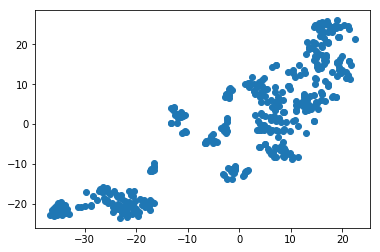

In [54]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

# TASK 2

In [55]:
from sklearn.cluster import KMeans

In [75]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [86]:
label_trains = kmeans.fit_predict(X_train_scaled)
label_trains

array([1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0,
       2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2,
       1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0,
       0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2,
       1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1,
       1, 1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2,
       2, 1, 1, 0, 2, 1, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 0,
       1, 2, 2, 0, 1, 2, 1, 1, 1, 0, 2, 1, 0, 0, 0,

In [77]:
pd.value_counts(label_trains)

0    191
1    127
2     86
dtype: int64

Text(4, 22, 'Кластер 2')

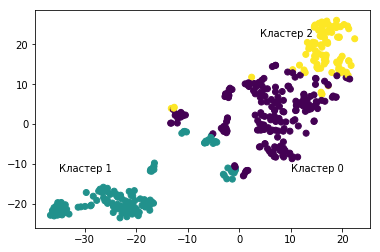

In [88]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=label_trains)
plt.text(-35, -12, "Кластер 1")
plt.text(10, -12, "Кластер 0")
plt.text(4, 22, "Кластер 2")

In [98]:
price_mean_cluster_0 = y_train[label_trains==0].mean()
price_mean_cluster_0

price    24.958115
dtype: float64

In [101]:
price_mean_cluster_1 = y_train[label_trains==1].mean()
price_mean_cluster_1

price    16.165354
dtype: float64

In [102]:
price_mean_cluster_2 = y_train[label_trains==2].mean()
price_mean_cluster_2

price    27.788372
dtype: float64

In [106]:
crim = X_train['CRIM']

In [107]:
crim_mean_cluster_0 = crim[label_trains==0].mean()
crim_mean_cluster_0

0.4216602094240837

In [108]:
crim_mean_cluster_1 = crim[label_trains==1].mean()
crim_mean_cluster_1

10.797028425196851

In [109]:
crim_mean_cluster_2 = crim[label_trains==2].mean()
crim_mean_cluster_2

0.07356558139534884

# TASK 3

In [112]:
labels_test = kmeans.predict(X_test_scaled)

In [115]:
price_mean_cluster_0 = y_test[labels_test==0].mean()
price_mean_cluster_0

price    21.860784
dtype: float64

In [113]:
price_mean_cluster_1 = y_test[labels_test==1].mean()
price_mean_cluster_1

price    16.437143
dtype: float64

In [116]:
price_mean_cluster_2 = y_test[labels_test==2].mean()
price_mean_cluster_2

price    31.35
dtype: float64

In [117]:
crim = X_test['CRIM']

In [120]:
crim_mean_cluster_0 = crim[labels_test==0].mean()
crim_mean_cluster_0

0.2660788235294118

In [119]:
crim_mean_cluster_1 = crim[labels_test==1].mean()
crim_mean_cluster_1

10.165531142857143

In [118]:
crim_mean_cluster_2 = crim[labels_test==2].mean()
crim_mean_cluster_2

0.06206